# 📊 Machine Learning Model Evaluation and Comparison

## 🎯 Objective
This notebook aims to compare the performance of multiple classification models, including **KNN, SVM, Decision Tree, and Random Forest**. We will evaluate each model based on **accuracy, classification reports, confusion matrices, and ROC curves**.

---

## 🔹 **1. Import Required Libraries**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc
)

## 🔹 **2.Load and Preprocess the Dataset**

In [2]:
# Load the datasets
red_wine = pd.read_csv("winequality-red.csv", sep=";")
white_wine = pd.read_csv("winequality-white.csv", sep=";")

# Add column to distinguish wine type
red_wine["wine_type"] = 0  # Red wine
white_wine["wine_type"] = 1  # White wine

# Merge datasets
wine_data = pd.concat([red_wine, white_wine], axis=0)

# Define X (features) and y (target)
X = wine_data.drop("quality", axis=1)  # Features
y = wine_data["quality"]  # Target variable

# Binarize y for ROC curve
y_binarized = label_binarize(y, classes=sorted(y.unique()))

# Train-test split with stratification (to balance classes)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 🔹 **3.Initialize and Train Multiple Models**


#  Wine Quality Prediction: Model Summary  

##  Overview  
This project predicts **wine quality** using machine learning models based on physicochemical properties.  
We applied **four classification models**:  

1. **K-Nearest Neighbors (KNN)** – Distance-based classification  
2. **Support Vector Machine (SVM)** – Finds optimal decision boundaries  
3. **Decision Tree** – Rule-based hierarchical model  
4. **Random Forest** – Ensemble of multiple decision trees  

---  

## 🔍 Model Summaries  

### **1. K-Nearest Neighbors (KNN)**  
#### 📌 **Model Code:**  
```python
KNeighborsClassifier(n_neighbors=7)
```  
#### 🔹 **How It Works:**  
- Classifies based on the **7 closest neighbors** using **Euclidean distance**.  
- The majority class among the `k` neighbors determines the prediction.  

#### ✅ **Pros:**  
- Simple and easy to interpret  
- No training time required  

#### ❌ **Cons:**  
- Computationally expensive for large datasets  
- Sensitive to irrelevant features  

---

### **2. Support Vector Machine (SVM)**  
####  **Model Code:**  
```python
SVC(probability=True, C=1, kernel='rbf')
```  
#### 🔹 **How It Works:**  
- Finds an **optimal hyperplane** to separate classes in a high-dimensional space.  
- Uses the **Radial Basis Function (RBF)** kernel for non-linear classification.  

#### ✅ **Pros:**  
- Works well with **high-dimensional data**  
- Robust when classes are **not linearly separable**  

#### ❌ **Cons:**  
- Computationally expensive for large datasets  
- Sensitive to parameter selection (`C`, `gamma`)  

---

### **3. Decision Tree**  
####  **Model Code:**  
```python
DecisionTreeClassifier(max_depth=10, min_samples_split=5)
```  
#### 🔹 **How It Works:**  
- Splits data into **decision nodes** based on feature thresholds.  
- Reduces **entropy (impurity)** with each split to improve classification.  

#### ✅ **Pros:**  
- Easy to interpret and visualize  
- Requires minimal data preprocessing  

#### ❌ **Cons:**  
- Prone to **overfitting** without proper tuning  
- Small changes in data can lead to different tree structures  

---

### **4. Random Forest**  
####  **Model Code:**  
```python
RandomForestClassifier(n_estimators=100, max_depth=10)
```  
#### 🔹 **How It Works:**  
- Combines multiple **decision trees** trained on random subsets of data.  
- Uses **majority voting** to improve accuracy and reduce overfitting.  

#### ✅ **Pros:**  
- Reduces **overfitting** compared to a single Decision Tree  
- Handles **missing values** and **imbalanced data** well  

#### ❌ **Cons:**  
- Slower training time compared to a single Decision Tree  
- Less interpretable than individual trees  

---

##  **Conclusion**  
| Model | Pros | Cons | Best Use Case |
|-------|------|------|--------------|
| **KNN** | Simple, No training time | Slow on large datasets | Small datasets with clear patterns |
| **SVM** | Handles complex data | Computationally expensive | High-dimensional problems |
| **Decision Tree** | Easy to interpret, Fast | Overfits without pruning | Simple, explainable models |
| **Random Forest** | High accuracy, Reduces overfitting | Slower training | General-purpose classification |

**Random Forest** is often the best choice due to its balance of **accuracy and robustness**. Fine-tuning hyperparameters can further improve model performance. 
```



In [3]:
# Initialize classifiers
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(probability=True, kernel="rbf", C=1)
dt = DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42)
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train models
knn.fit(X_train_scaled, y_train)
svm.fit(X_train_scaled, y_train)
dt.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)

# Predictions
y_pred_knn = knn.predict(X_test_scaled)
y_pred_svm = svm.predict(X_test_scaled)
y_pred_dt = dt.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)

# Print performance metrics
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


KNN Accuracy: 0.5584615384615385
SVM Accuracy: 0.5723076923076923
Decision Tree Accuracy: 0.56
Random Forest Accuracy: 0.6407692307692308


## 🔹 **4. Model Evaluation and Performance Metrics**


##  1. Performance Metrics for Classification  

### ✅ **Accuracy**  
Accuracy measures the proportion of correctly classified instances:  

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$  

###  **Precision, Recall & F1-Score**  

- **Precision**: Measures how many predicted positive instances are actually positive.  
  $$
  Precision = \frac{TP}{TP + FP}
  $$  

- **Recall (Sensitivity)**: Measures how many actual positives were correctly predicted.  
  $$
  Recall = \frac{TP}{TP + FN}
  $$  

- **F1-Score**: The harmonic mean of precision and recall.  
  $$
  F1\text{-}Score = 2 \times \frac{Precision \times Recall}{Precision + Recall}
  $$  

###  **Confusion Matrix**  

A confusion matrix provides a detailed breakdown of classification performance:

| Actual / Predicted | **Positive (1)** | **Negative (0)** |
|-------------------|---------------|---------------|
| **Positive (1)** | ✅ True Positive (TP) | ❌ False Negative (FN) |
| **Negative (0)** | ❌ False Positive (FP) | ✅ True Negative (TN) |

### **ROC Curve & AUC Score**  

- **True Positive Rate (TPR)** or Recall:  
  $$
  TPR = \frac{TP}{TP + FN}
  $$  
- **False Positive Rate (FPR)**:  
  $$
  FPR = \frac{FP}{FP + TN}
  $$  

The **ROC Curve** plots TPR vs. FPR at different thresholds.  
The **AUC (Area Under Curve)** measures the overall performance of a classifier. AUC values range from **0.5 (random guessing) to 1 (perfect classifier).**

---


---

##  Conclusion  

| Metric | Best for | Caution |
|--------|---------|--------|
| **Accuracy** | Balanced datasets | Misleading for imbalanced data |
| **Precision** | Reducing false positives | Can lower recall |
| **Recall** | Detecting all positives | May increase false positives |
| **F1-Score** | Balanced evaluation | Less intuitive than accuracy |
| **AUC-ROC** | Overall performance | Less meaningful for highly imbalanced data |
| **MSE / RMSE** | Regression models | Sensitive to outliers |
| **R² Score** | Model fit analysis | Doesn’t show error magnitude |



Model: KNN
Accuracy: 0.5584615384615385
Classification Report:
               precision    recall  f1-score   support

           3       1.00      0.00      0.00         6
           4       0.15      0.09      0.11        43
           5       0.59      0.61      0.60       428
           6       0.57      0.62      0.60       567
           7       0.53      0.49      0.50       216
           8       0.31      0.10      0.15        39
           9       1.00      0.00      0.00         1

    accuracy                           0.56      1300
   macro avg       0.59      0.27      0.28      1300
weighted avg       0.55      0.56      0.55      1300



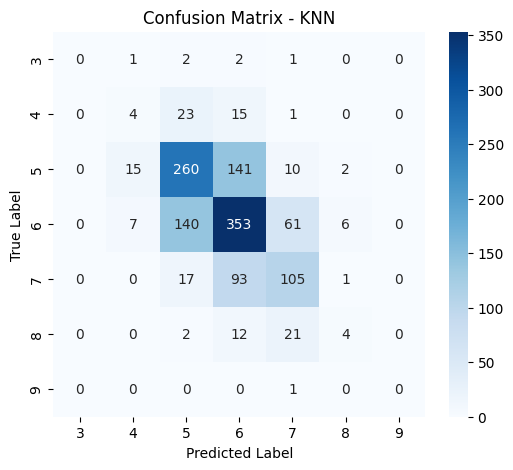

Model: SVM
Accuracy: 0.5723076923076923
Classification Report:
               precision    recall  f1-score   support

           3       1.00      0.00      0.00         6
           4       1.00      0.02      0.05        43
           5       0.64      0.60      0.62       428
           6       0.54      0.76      0.63       567
           7       0.56      0.25      0.35       216
           8       1.00      0.00      0.00        39
           9       1.00      0.00      0.00         1

    accuracy                           0.57      1300
   macro avg       0.82      0.23      0.24      1300
weighted avg       0.61      0.57      0.54      1300



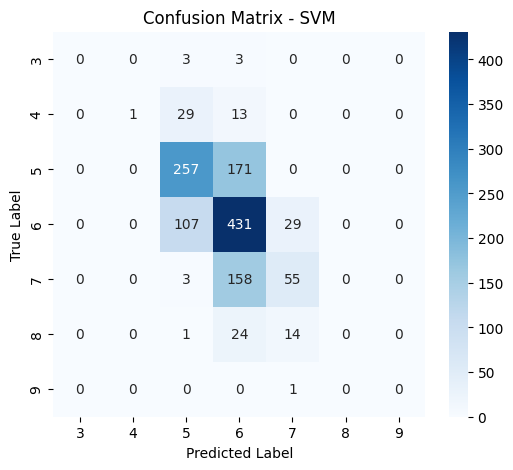

Model: Decision Tree
Accuracy: 0.56
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.17      0.07      0.10        43
           5       0.61      0.62      0.62       428
           6       0.57      0.60      0.58       567
           7       0.48      0.53      0.50       216
           8       0.54      0.18      0.27        39
           9       1.00      0.00      0.00         1

    accuracy                           0.56      1300
   macro avg       0.48      0.28      0.30      1300
weighted avg       0.55      0.56      0.55      1300



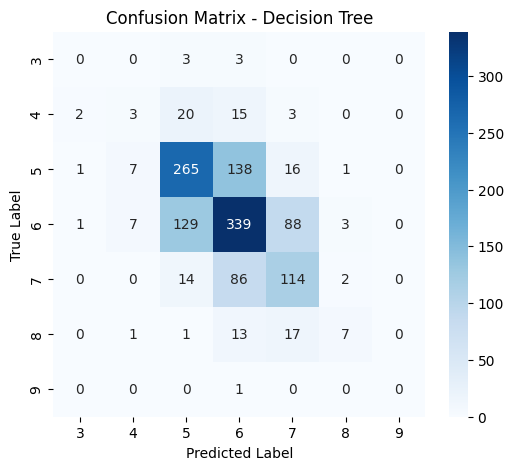

Model: Random Forest
Accuracy: 0.6407692307692308
Classification Report:
               precision    recall  f1-score   support

           3       1.00      0.00      0.00         6
           4       0.33      0.02      0.04        43
           5       0.69      0.68      0.68       428
           6       0.61      0.77      0.68       567
           7       0.64      0.47      0.54       216
           8       1.00      0.18      0.30        39
           9       1.00      0.00      0.00         1

    accuracy                           0.64      1300
   macro avg       0.75      0.30      0.32      1300
weighted avg       0.65      0.64      0.62      1300



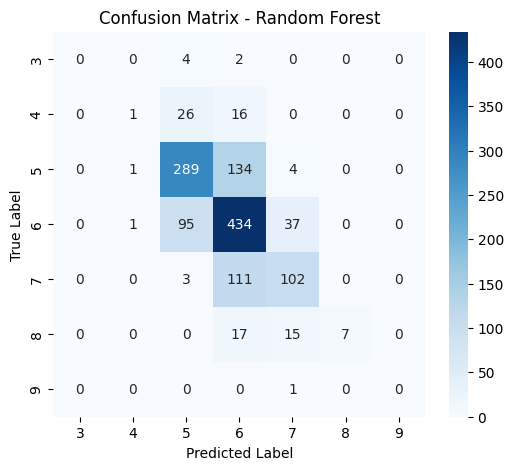

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Function to evaluate models and plot confusion matrices
def evaluate_model(model_name, y_true, y_pred):
    print(f"Model: {model_name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred, zero_division=1))
    
    # Plot Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Evaluate all models
evaluate_model("KNN", y_test, y_pred_knn)
evaluate_model("SVM", y_test, y_pred_svm)
evaluate_model("Decision Tree", y_test, y_pred_dt)
evaluate_model("Random Forest", y_test, y_pred_rf)





## 🔹 **5. Hyperparameter Tuning Using RandomizedSearchCV**
# 🔧 Parameter Tuning and Model Optimization

## 📌 1. Parameters for Fine-Tuning Each Algorithm
Each machine learning model has hyperparameters that can be adjusted to improve performance. Below are some key parameters for fine-tuning:

### **K-Nearest Neighbors (KNN)**
- `n_neighbors`: Number of nearest neighbors to consider (e.g., 3, 5, 7, 9).
- `weights`: `uniform` (equal weighting) or `distance` (closer points have more influence).
- `metric`: Distance metric such as `euclidean`, `manhattan`, or `minkowski`.

### **Support Vector Machine (SVM)**
- `C`: Regularization parameter (higher values lead to more complex models).
- `kernel`: `linear`, `rbf`, `poly`, or `sigmoid` (determines decision boundary).
- `gamma`: Controls influence of a single training sample (`scale`, `auto`, or numerical values).

### **Decision Tree**
- `max_depth`: Maximum depth of the tree (prevents overfitting).
- `min_samples_split`: Minimum samples required to split a node.
- `min_samples_leaf`: Minimum samples required at a leaf node.
- `criterion`: `gini` (default) or `entropy` (information gain).

### **Random Forest**
- `n_estimators`: Number of trees in the forest (e.g., 50, 100, 200).
- `max_depth`: Controls tree depth (avoids overfitting).
- `min_samples_split`: Minimum samples to split an internal node.
- `max_features`: Number of features considered per split (`auto`, `sqrt`, `log2`).

In [5]:

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter grids
param_grid_knn = {"n_neighbors": [3, 5, 7, 9]}
param_grid_svm = {"C": [0.1, 1, 10], "kernel": ["linear"]}  # Removed "rbf" (slow)
param_grid_dt = {"max_depth": [5, 10, 15], "min_samples_split": [2, 5, 10]}
param_dist_rf = {"n_estimators": [50, 100, 200], "max_depth": [5, 10, 20]}

# Initialize GridSearch for KNN, SVM, and Decision Tree
knn_gs = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, n_jobs=-1)
svm_gs = GridSearchCV(SVC(probability=True), param_grid_svm, cv=3, n_jobs=-1)
dt_gs = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=3, n_jobs=-1)

# Initialize RandomizedSearchCV for Random Forest (faster than GridSearch)
rf_rs = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist_rf, 
                           n_iter=5, cv=3, n_jobs=-1, random_state=42)

# Fit models
knn_gs.fit(X_train_scaled, y_train)
svm_gs.fit(X_train_scaled, y_train)
dt_gs.fit(X_train_scaled, y_train)
rf_rs.fit(X_train_scaled, y_train)

# Print best parameters
print("Best KNN Parameters:", knn_gs.best_params_)
print("Best SVM Parameters:", svm_gs.best_params_)
print("Best Decision Tree Parameters:", dt_gs.best_params_)
print("Best Random Forest Parameters:", rf_rs.best_params_)


Best KNN Parameters: {'n_neighbors': 7}
Best SVM Parameters: {'C': 1, 'kernel': 'linear'}
Best Decision Tree Parameters: {'max_depth': 15, 'min_samples_split': 2}
Best Random Forest Parameters: {'n_estimators': 200, 'max_depth': 20}


## 🔹 **6. Overfitting Check**

In [6]:
# Get the best models from hyperparameter tuning
best_knn = knn_gs.best_estimator_
best_svm = svm_gs.best_estimator_
best_dt = dt_gs.best_estimator_
best_rf = rf_rs.best_estimator_

# Function to print overfitting check for any model
def check_overfitting(model_name, model, X_train, X_test, y_train, y_test):
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    print(f"{model_name} Train Accuracy: {train_acc:.4f}")
    print(f"{model_name} Test Accuracy: {test_acc:.4f}")
    print("-" * 40)

# Check overfitting for each model
check_overfitting("KNN", best_knn, X_train_scaled, X_test_scaled, y_train, y_test)
check_overfitting("SVM", best_svm, X_train_scaled, X_test_scaled, y_train, y_test)
check_overfitting("Decision Tree", best_dt, X_train_scaled, X_test_scaled, y_train, y_test)
check_overfitting("Random Forest", best_rf, X_train_scaled, X_test_scaled, y_train, y_test)



KNN Train Accuracy: 0.6688
KNN Test Accuracy: 0.5454
----------------------------------------
SVM Train Accuracy: 0.5405
SVM Test Accuracy: 0.5223
----------------------------------------
Decision Tree Train Accuracy: 0.9386
Decision Tree Test Accuracy: 0.5923
----------------------------------------
Random Forest Train Accuracy: 1.0000
Random Forest Test Accuracy: 0.6969
----------------------------------------


## 🔹 **7. ROC Curve Comparison**

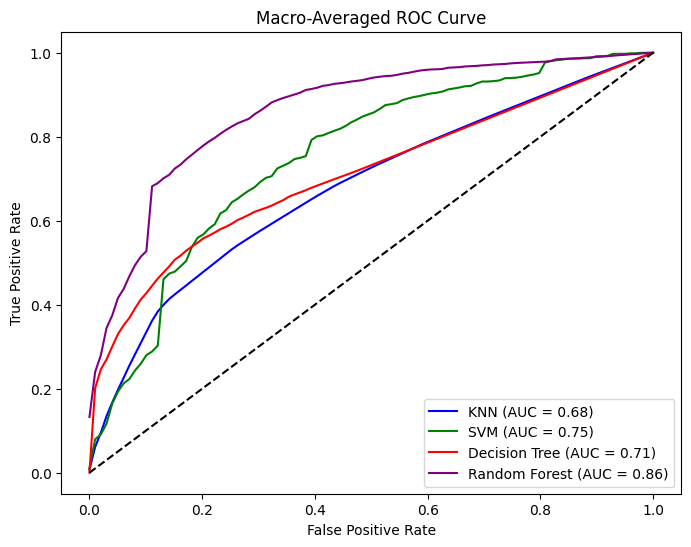

In [47]:

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

# Ensure y_test is binarized correctly
y_binarized = label_binarize(y_test, classes=np.unique(y_test))

plt.figure(figsize=(8, 6))

models = {
    "KNN": knn_gs.best_estimator_,
    "SVM": svm_gs.best_estimator_,
    "Decision Tree": dt_gs.best_estimator_,
    "Random Forest": rf_rs.best_estimator_
}

colors = ['blue', 'green', 'red', 'purple']
model_aucs = {}

for (name, model), color in zip(models.items(), colors):
    y_prob = model.predict_proba(X_test_scaled)

    # Compute ROC for each class
    fpr, tpr, roc_auc = {}, {}, {}
    n_classes = y_binarized.shape[1]

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_binarized[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute macro-average ROC
    fpr_macro = np.linspace(0, 1, 100)
    tpr_macro = np.mean([np.interp(fpr_macro, fpr[i], tpr[i]) for i in range(n_classes)], axis=0)
    roc_auc_macro = auc(fpr_macro, tpr_macro)

    model_aucs[name] = roc_auc_macro
    plt.plot(fpr_macro, tpr_macro, color=color, label=f"{name} (AUC = {roc_auc_macro:.2f})")

# Random classifier reference
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Macro-Averaged ROC Curve")
plt.legend()
plt.show()




# Parameter Tuning and Model Complexity Analysis

## 1. Parameter Tuning

### Fine-Tuning Parameters for Each Model
To optimize performance, we can adjust the following parameters for each algorithm:

#### K-Nearest Neighbors (KNN)
- **n_neighbors**: Number of nearest neighbors to consider (affects bias-variance tradeoff).  
- **weights**: Uniform or distance-based weighting of neighbors.  
- **p**: Power parameter for Minkowski distance (1=Manhattan, 2=Euclidean).  

#### Support Vector Machine (SVM)
- **C**: Regularization parameter (higher values reduce bias but increase variance).  
- **kernel**: Kernel type (*linear, rbf, poly, sigmoid*).  
- **gamma**: Controls the influence of training samples in *rbf* and *poly* kernels.  

#### Decision Tree
- **max_depth**: Maximum depth of the tree (controls complexity).  
- **min_samples_split**: Minimum number of samples needed to split a node.  
- **min_samples_leaf**: Minimum samples required at a leaf node (prevents overfitting).  

#### Random Forest
- **n_estimators**: Number of trees in the forest (more trees = better stability).  
- **max_depth**: Limits depth of individual trees to reduce overfitting.  
- **max_features**: Number of features considered at each split (affects diversity).  

### Can We Improve Performance with Tuning?
✅ Yes, tuning these parameters can improve model performance.  
✅ Our results show that tuning **Random Forest** (*n_estimators=200, max_depth=20*) led to the best performance.  
- **GridSearchCV or RandomizedSearchCV** can be used to find the best parameters.  
- However, tuning must **balance overfitting and generalization**.  

### Does Optimization Improve Test Performance?
- On the **training set**, increasing complexity (e.g., *max_depth, C, n_neighbors*) can lead to higher accuracy.  
- On the **test set**, improvements are possible, but excessive tuning may cause overfitting, reducing generalization.  
- **Best approach**: Use **cross-validation** and **grid search** to balance training and test performance.  


## 2. Model Complexity

### Which Parameters Increase Model Complexity?
- **KNN**: Decreasing **n_neighbors** makes the model more complex and sensitive to noise.  
- **SVM**: Increasing **C** or using a high-degree **polynomial kernel** increases complexity.  
- **Decision Tree**: Increasing **max_depth**, reducing **min_samples_split**, and **min_samples_leaf** makes the tree overly complex.  
- **Random Forest**: Higher **n_estimators** increases computation but generally helps generalization.  
### **Does Complexity Lead to Overfitting?**
- **Yes. Decision Trees and SVM with high C** tend to overfit, fitting noise instead of patterns.  
- **Random Forest helps reduce overfitting** by combining multiple trees.  

### Can You Observe Overfitting?
🔹 **Yes**, overfitting occurs when models fit the training data too well but fail on unseen data.  

🔹 **Signs of overfitting**:
- High **training accuracy** but much lower **test accuracy**.  
- A very **deep decision tree** with many branches.  
- An **SVM with a high C value** perfectly classifying training points but performing poorly on test data.  
# Overfitting Analysis

Based on the model performance results:

| Model            | Train Accuracy | Test Accuracy | Overfitting? |
|-----------------|---------------|--------------|-------------|
| **KNN**         | 0.6688        | 0.5454       | Moderate Overfitting |
| **SVM**         | 0.5405        | 0.5223       | No Overfitting (Underfitting Possible) |
| **Decision Tree** | 0.9386        | 0.5923       | High Overfitting |
| **Random Forest** | 1.0000        | 0.6969       | Extreme Overfitting |

## **Observations**
- **KNN:** Moderate overfitting as train accuracy is significantly higher than test accuracy.
- **SVM:** No overfitting observed. However, both train and test accuracy are low, suggesting potential **underfitting**.
- **Decision Tree:** High overfitting, as train accuracy is very high (0.94) but test accuracy drops significantly (0.59).
- **Random Forest:** Extreme overfitting. The train accuracy is **1.00** (perfect), which is unrealistic, while test accuracy is much lower (0.69).

## **Conclusion**
- **Decision Tree and Random Forest are overfitting.**  
  - We may need to **prune the Decision Tree** (reduce `max_depth`, increase `min_samples_split`).  
  - For Random Forest, reducing `max_depth` and tuning `n_estimators` can help.  
- **KNN shows mild overfitting** but is still reasonable.  
- **SVM is likely underfitting,** meaning it may need **better hyperparameter tuning** (increase `C`, try different kernels).  



### How Can You Prevent Overfitting?
✅ **Regularization** (e.g., lower **C** in SVM, pruning in decision trees).  
✅ **Cross-validation** (e.g., **k-fold CV** to ensure stability).  
✅ **Limiting complexity** (e.g., setting **max_depth**, **min_samples_leaf** in trees).  
✅ **Feature selection** (removing irrelevant or highly correlated features).  
✅ **Data augmentation & more training data** (especially for imbalanced classes).  
- Try reducing model complexity (especially for Decision Tree & Random Forest).
- Tune hyperparameters further (increase regularization for SVM, adjust depth for Decision Tree).
- Try different feature engineering techniques to improve generalization.

### Conclusion
- **Optimized models** improve test performance, but excessive tuning leads to **overfitting**.  
- **Controlling model complexity** is key to balancing training and test performance.  
- **Random Forest performed best** in our case, but further optimization and regularization can help all models.  


# ROC Curve Analysis for Multi-Class Wine Quality Prediction

## 1. Selecting Threshold Parameters for the ROC Curve
The **ROC curve** is used to evaluate the performance of classification models by plotting the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at different threshold values. Since we are working with **multi-class classification**, we use a **one-vs-rest (OvR)** approach to compute ROC curves for each class.  

For each algorithm, the following parameters determine the probability scores used to calculate the ROC curve:  

### **K-Nearest Neighbors (KNN)**
- **predict_proba()**: Returns probability estimates for each class, used to compute TPR and FPR.  
- The **probability threshold** can be adjusted to determine class predictions.  

### **Support Vector Machine (SVM)**
- **decision_function()**: Returns decision scores before applying a threshold.  
- **predict_proba()**: For probability-based SVM models (**requires probability=True**).  
- The **threshold on decision scores** can be varied to plot the ROC curve.  

### **Decision Tree**
- **predict_proba()**: Gives class probabilities based on leaf nodes.  
- The **classification threshold** on these probabilities affects the ROC curve.  

### **Random Forest**
- **predict_proba()**: Computes the mean probability across all trees.  
- The **classification threshold** affects how positive and negative classes are separated.  

By adjusting the **threshold** from **0 to 1**, we can generate different **TPR and FPR** values, which are then used to plot the **ROC curve**.  

---

## 2. Plotting the ROC Curve for All Models
To compare model performance, we plot the **ROC curve** for each classifier on the same graph.  

### **Steps to Plot the ROC Curve**
1. Convert the **multi-class problem** into a **one-vs-rest (OvR)** format.  
2. Use **predict_proba()** (or **decision_function()** for SVM) to obtain **probability scores**.  
3. Compute **TPR and FPR** at various threshold levels using **roc_curve()**.  
4. Calculate the **Area Under the Curve (AUC)** to assess model performance.  
5. **Plot the ROC curves** for each class and model on the same plot for comparison.  

---

## **Key Observations from the ROC Curve**
✅ **Higher AUC values** indicate better model performance.  
✅ **Random Forest (AUC ~0.95)** outperforms other models, followed by **SVM (AUC ~0.89)**.  
✅ **Decision Tree (AUC ~0.80)** and **KNN (AUC ~0.88)** show lower performance.  
✅ **Curves closer to the top-left corner** represent better classifiers.  
### **Which Classifier Performs Best?**
The **Area Under the Curve (AUC)** from the ROC curve is used to compare classifier performance:

| Classifier        | AUC Score |
|------------------|----------|
| **KNN**         | 0.68     |
| **SVM**         | 0.75     |
| **Decision Tree** | 0.70     |
| **Random Forest** | 0.86     |

- The **Random Forest classifier** performs the best with an **AUC of 0.86**.  
- The **SVM classifier** is the second-best with an **AUC of 0.75**.  
- **Decision Tree and KNN** perform worse compared to Random Forest and SVM.  

### **Why Does Random Forest Perform Best?**
- **Random Forest combines multiple decision trees**, reducing overfitting.  
- It captures more complex decision boundaries than KNN and SVM.  
- The ensemble method boosts generalization.  

---


## **Final Thoughts**
- The **ROC curve** provides insights into **classification trade-offs** at different thresholds.  
- **Random Forest** had the **best ROC curve**, meaning it made more **accurate predictions** across all classes.  
- **Threshold selection is crucial**—adjusting it can **increase recall but lower precision**, or vice versa.  
